In [1]:
import pandas as pd
import numpy as np
from numpy import *

import gc
import time
import warnings
import os

from datetime import datetime
from datetime import timedelta

from scipy.misc import imread
from scipy import sparse
from scipy.stats import ss
import math

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y,check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import sparse

import keras
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras import optimizers

from sklearn.metrics import mean_squared_error




Using TensorFlow backend.


In [2]:
print("Reading Data....")
print(os.listdir('.'))

Reading Data....
['sample_data', '.config', 'test.csv', 'train.csv', 'stores.csv', 'features.csv']


In [0]:
train = pd.read_csv('train.csv')

In [4]:
print(len(train))

421570


In [5]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [0]:
featuers_df = pd.read_csv('features.csv')

In [7]:
featuers_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [8]:
featuers_df.shape

(8190, 12)

In [9]:
featuers_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [0]:
stores_df = pd.read_csv('stores.csv')

In [11]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [12]:
stores_df.shape

(45, 3)

In [13]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [0]:
df1 = pd.merge(stores_df,train,on='Store')

In [15]:
df1.shape

(421570, 7)

In [16]:
df1.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [0]:
df = pd.merge(df1,featuers_df,on=['Store','Date'])

In [18]:
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,B,118221,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,B,118221,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,B,118221,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,B,118221,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,B,118221,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [0]:
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [0]:
sns.set(style='white')

In [0]:
corr = df.corr()

In [0]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

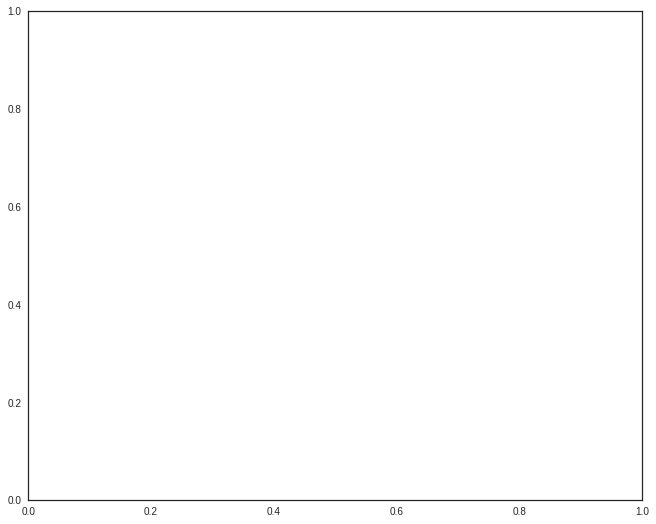

In [24]:
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)

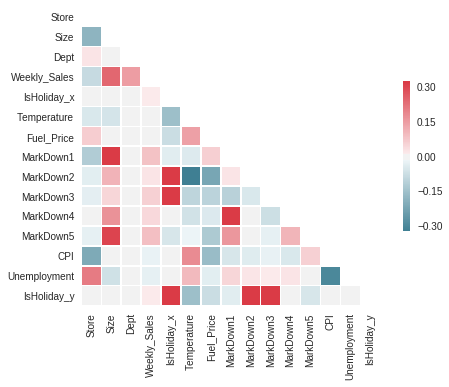

In [25]:
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=0.5,cbar_kws={"shrink":0.5})

In [26]:
df.loc[df['Weekly_Sales'] > 300000]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
32594,4,A,205863,72,2010-11-26,381072.11,True,8.933333,2.752,NaN,NaN,NaN,NaN,NaN,126.669267,7.127,True
36312,4,A,205863,72,2011-11-25,385051.04,True,8.866667,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,True
36557,4,A,205863,7,2011-12-23,318422.01,False,2.177778,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,False
51826,6,A,202505,72,2010-11-26,342578.65,True,18.772222,2.735,NaN,NaN,NaN,NaN,NaN,213.267296,7.007,True
55545,6,A,202505,72,2011-11-25,326866.60,True,17.100000,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,6.551,True
90645,10,B,126512,72,2010-11-26,693099.36,True,12.961111,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,True
90886,10,B,126512,7,2010-12-24,406988.63,False,13.922222,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False
90936,10,B,126512,72,2010-12-24,404245.03,False,13.922222,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False
94393,10,B,126512,72,2011-11-25,630999.19,True,15.933333,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,True
94634,10,B,126512,7,2011-12-23,341308.00,False,9.088889,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,False


In [27]:
df.loc[df['Weekly_Sales']>240000,'Date'].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2010-02-05     1
2011-08-26     1
Name: Date, dtype: int64

In [28]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [0]:
df = df.assign(md1_present = df.MarkDown1.notnull())

In [0]:
df = df.assign(md2_present = df.MarkDown2.notnull())
df = df.assign(md3_present = df.MarkDown3.notnull())
df = df.assign(md4_present = df.MarkDown4.notnull())
df = df.assign(md5_present = df.MarkDown5.notnull())

In [0]:
df.fillna(0,inplace=True)

In [0]:
df['Type'] = 'Type_' + df['Type'].map(str)

In [0]:
df = df.drop(['IsHoliday_y'],axis=1)

In [0]:
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)
df['IsHoliday_x'] = 'IsHoliday_' + df['IsHoliday_x'].map(str)

In [0]:
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])
holiday_dummies = pd.get_dummies(df['IsHoliday_x'])

In [0]:
df['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] = 'Month_' + df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [0]:
df['Black_Friday'] = np.where((df['DateType']==datetime(2010, 11, 26).date()) | (df['DateType']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==datetime(2010, 12, 23).date()) | (df['DateType']==datetime(2010, 12, 24).date()) | (df['DateType']==datetime(2011, 12, 23).date()) | (df['DateType']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

In [0]:
df = pd.concat([df,holiday_dummies,Pre_christmas_dummies,Black_Friday_dummies],axis=1)

In [39]:
medians = pd.DataFrame({'Median Sales' :df.groupby(by=['Type','Dept','Store','Month','IsHoliday_x'])['Weekly_Sales'].median()}).reset_index()
medians.head()


,Type,Dept,Store,Month,IsHoliday_x,Median Sales
0,Type_A,Dept_1,Store_1,Month_1,IsHoliday_False,17350.585
1,Type_A,Dept_1,Store_1,Month_10,IsHoliday_False,23388.030
2,Type_A,Dept_1,Store_1,Month_11,IsHoliday_False,19551.115
3,Type_A,Dept_1,Store_1,Month_11,IsHoliday_True,19865.770
4,Type_A,Dept_1,Store_1,Month_12,IsHoliday_False,39109.390


In [0]:
df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday_x'])

In [0]:
# Fill NA
df['Median Sales'].fillna(df['Median Sales'].median(), inplace=True) 

# Create a key for easy access

df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday_x'].map(str)

In [42]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,...,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,Store_1,Type_A,151315,Dept_1,2010-02-05,24924.50,IsHoliday_False,5.727778,2.572,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False
1,Store_1,Type_A,151315,Dept_1,2010-02-19,41595.55,IsHoliday_False,4.405556,2.514,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False
2,Store_1,Type_A,151315,Dept_1,2010-02-26,19403.54,IsHoliday_False,8.127778,2.561,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False
3,Store_1,Type_A,151315,Dept_1,2011-02-04,21665.76,IsHoliday_False,5.705556,2.989,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False
4,Store_1,Type_A,151315,Dept_1,2011-02-18,46845.87,IsHoliday_False,14.088889,3.045,0.0,...,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False


In [43]:
df['DateLagged'] = df['DateType']- timedelta(days=7)
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,Store_1,Type_A,151315,Dept_1,2010-02-05,24924.50,IsHoliday_False,5.727778,2.572,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False,2010-01-29
1,Store_1,Type_A,151315,Dept_1,2010-02-19,41595.55,IsHoliday_False,4.405556,2.514,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False,2010-02-12
2,Store_1,Type_A,151315,Dept_1,2010-02-26,19403.54,IsHoliday_False,8.127778,2.561,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False,2010-02-19
3,Store_1,Type_A,151315,Dept_1,2011-02-04,21665.76,IsHoliday_False,5.705556,2.989,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False,2011-01-28
4,Store_1,Type_A,151315,Dept_1,2011-02-18,46845.87,IsHoliday_False,14.088889,3.045,0.0,...,Pre_christmas_no,1,0,1,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False,2011-02-11


In [0]:
sorted_df = df.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [45]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0% loaded
10% loaded
20% loaded
30% loaded
40% loaded
50% loaded
60% loaded
70% loaded
80% loaded
90% loaded


In [46]:
sorted_df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-12,24924.50,46039.49,37887.17
2,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
3,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
4,Dept_1,Store_1,2010-03-05,19403.54,21827.90,21280.40


In [0]:
df = df.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], 
              how = 'inner', on = ['Dept', 'Store','DateType'])

In [48]:
df['Sales_dif'] = df['Median Sales'] - df['LaggedSales']
df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-05,23510.49,24924.50,23510.49
1,Dept_1,Store_1,2010-02-19,46039.49,41595.55,23510.49
2,Dept_1,Store_1,2010-02-26,41595.55,19403.54,23510.49
3,Dept_1,Store_1,2011-02-04,18461.18,21665.76,23510.49
4,Dept_1,Store_1,2011-02-18,37887.17,46845.87,23510.49


In [0]:
df['Difference'] = df['Median Sales'] - df['Weekly_Sales']

In [0]:
switch= 1

if(switch):
    df_backup = df.copy()
else:
    df=df_backup
    display(df_backup.head())

In [0]:
df['Unemployment'] = (df['Unemployment'] - df['Unemployment'].mean())/(df['Unemployment'].std())
df['Temperature'] = (df['Temperature'] - df['Temperature'].mean())/(df['Temperature'].std())
df['Fuel_Price'] = (df['Fuel_Price'] - df['Fuel_Price'].mean())/(df['Fuel_Price'].std())
df['CPI'] = (df['CPI'] - df['CPI'].mean())/(df['CPI'].std())
df['MarkDown1'] = (df['MarkDown1'] - df['MarkDown1'].mean())/(df['MarkDown1'].std())
df['MarkDown2'] = (df['MarkDown2'] - df['MarkDown2'].mean())/(df['MarkDown2'].std())
df['MarkDown3'] = (df['MarkDown3'] - df['MarkDown3'].mean())/(df['MarkDown3'].std())
df['MarkDown4'] = (df['MarkDown4'] - df['MarkDown4'].mean())/(df['MarkDown4'].std())
df['MarkDown5'] = (df['MarkDown5'] - df['MarkDown5'].mean())/(df['MarkDown5'].std())
df['LaggedSales']= (df['LaggedSales'] - df['LaggedSales'].mean())/(df['LaggedSales'].std())
df['Weekly_Sales']= (df['Weekly_Sales'] - df['Weekly_Sales'].mean())/(df['Weekly_Sales'].std())
df['Median Sales']= (df['Median Sales'] - df['Median Sales'].mean())/(df['Median Sales'].std())
df['Sales_dif']= (df['Sales_dif'] - df['Sales_dif'].mean())/(df['Sales_dif'].std())
df['Difference']= (df['Difference'] - df['Difference'].mean())/(df['Difference'].std())
df['Size']= (df['Size'] - df['Size'].mean())/(df['Size'].std())


In [52]:
df_backup.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_1,Type_A,151315,Dept_1,2010-02-05,24924.50,IsHoliday_False,5.727778,2.572,0.0,...,0,1,0,23510.49,Type_ADept_1Store_12010-02-05IsHoliday_False,2010-01-29,23510.49,0.0,0.00,-1414.01
1,Store_1,Type_A,151315,Dept_1,2010-02-19,41595.55,IsHoliday_False,4.405556,2.514,0.0,...,0,1,0,23510.49,Type_ADept_1Store_12010-02-19IsHoliday_False,2010-02-12,46039.49,1.0,-22529.00,-18085.06
2,Store_1,Type_A,151315,Dept_1,2010-02-26,19403.54,IsHoliday_False,8.127778,2.561,0.0,...,0,1,0,23510.49,Type_ADept_1Store_12010-02-26IsHoliday_False,2010-02-19,41595.55,1.0,-18085.06,4106.95
3,Store_1,Type_A,151315,Dept_1,2011-02-04,21665.76,IsHoliday_False,5.705556,2.989,0.0,...,0,1,0,23510.49,Type_ADept_1Store_12011-02-04IsHoliday_False,2011-01-28,18461.18,1.0,5049.31,1844.73
4,Store_1,Type_A,151315,Dept_1,2011-02-18,46845.87,IsHoliday_False,14.088889,3.045,0.0,...,0,1,0,23510.49,Type_ADept_1Store_12011-02-18IsHoliday_False,2011-02-11,37887.17,1.0,-14376.68,-23335.38


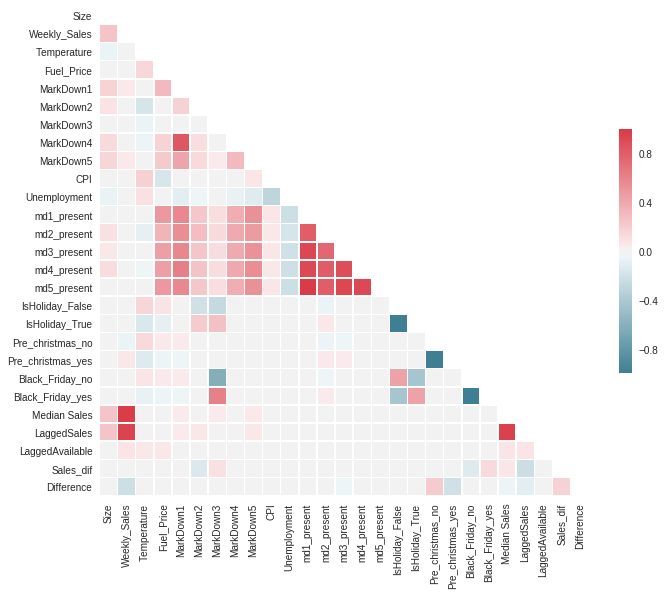

In [51]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
selector = [
    #'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    
    
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',

    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'Difference',
    'Sales_dif',
    'LaggedAvailable',    
    'LaggedSales'
    ]
#display(df[selector].describe())
#display(df[selector].head())
#display(df[['DateType','DateLagged','LaggedSales','Weekly_Sales']])


In [53]:
len(selector)

25

In [0]:
np.random.seed(42)
#X_train, X_dev, y_train, y_dev = train_test_split(df[selector], df['Weekly_Sales'], test_size=0.2, random_state=42)
#print(X_dev.shape)
#print(y_dev.shape)

In [0]:
from sklearn.model_selection import KFold

In [0]:
scores = []
#x_train = df[selector]
#y_train = df['Weekly_Sales']

In [0]:
#scaledFeatures = ['Unemployment','Temperature','Fuel_Price','CPI','MarkDown1','MarkDown2',
#                 'MarkDown3','MarkDown4','MarkDown5','LaggedSales','Weekly_Sales','Median Sales',
#               'Sales_dif','Difference','Size']
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(df[scaledFeatures])
#df[scaledFeatures] = scaler.transform(df[scaledFeatures])

In [62]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_1,Type_A,0.239209,Dept_1,2010-02-05,0.393781,IsHoliday_False,-0.963797,-1.720832,-0.427943,...,0,1,0,0.350923,Type_ADept_1Store_12010-02-05IsHoliday_False,2010-01-29,0.331340,0.0,0.037075,-0.295530
1,Store_1,Type_A,0.239209,Dept_1,2010-02-19,1.127827,IsHoliday_False,-1.092809,-1.847328,-0.427943,...,0,1,0,0.350923,Type_ADept_1Store_12010-02-19IsHoliday_False,2010-02-12,1.323055,1.0,-3.294498,-4.523067
2,Store_1,Type_A,0.239209,Dept_1,2010-02-26,0.150687,IsHoliday_False,-0.729624,-1.744823,-0.427943,...,0,1,0,0.350923,Type_ADept_1Store_12010-02-26IsHoliday_False,2010-02-19,1.127435,1.0,-2.637331,1.104506
3,Store_1,Type_A,0.239209,Dept_1,2011-02-04,0.250295,IsHoliday_False,-0.965965,-0.811373,-0.427943,...,0,1,0,0.350923,Type_ADept_1Store_12011-02-04IsHoliday_False,2011-01-28,0.109072,1.0,0.783763,0.530840
4,Store_1,Type_A,0.239209,Dept_1,2011-02-18,1.359005,IsHoliday_False,-0.147987,-0.689240,-0.427943,...,0,1,0,0.350923,Type_ADept_1Store_12011-02-18IsHoliday_False,2011-02-11,0.964194,1.0,-2.088938,-5.854472


In [0]:
kfold = KFold(n_splits=5,random_state=1).split(df)

In [60]:
scores = []
predicted_weeky_sales_avg = []
predicted_weeky_sales = pd.DataFrame({"Weekly_Sales": []})
actual_test = []
for k,(train,test) in enumerate(kfold):
  predicted_weeky_sales = []
  X_train = df.iloc[train][selector]
  y_train = df.iloc[train]['Weekly_Sales']
  X_dev = df.iloc[test][selector]
  y_dev = df.iloc[test]['Weekly_Sales']
  adam_regularized = Sequential()

  # First hidden layer now regularized
  train_X = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
  test_X = X_dev.values.reshape((X_dev.shape[0], 1, X_dev.shape[1]))
  
  adam_regularized.add(LSTM(25,input_shape=(1,X_train.shape[1]),activation='relu',
                    kernel_regularizer = regularizers.l2(0.01),
                             return_sequences=True))
  adam_regularized.add(Dropout(0.2))
    
    # Second hidden layer now regularized
  adam_regularized.add(LSTM(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)
                              ,return_sequences=False))
  adam_regularized.add(Dropout(0.2))
  
  adam_regularized.add(Dense(1,activation='linear'))

  # Setup adam optimizer
  adam_optimizer=keras.optimizers.Adam(lr=0.01,
                  beta_1=0.9, 
                  beta_2=0.999, 
                  epsilon=1e-08)

  # Compile the model
  adam_regularized.compile(optimizer=adam_optimizer,
                loss='mean_absolute_error',
                metrics=['mae'])

  # Train
  history_adam_regularized=adam_regularized.fit(train_X, y_train, # Train on training set
                               epochs=10, # We will train over 1,000 epochs
                               batch_size=2048, # Batch size 
                               verbose=0) # Suppress Keras output
  score = adam_regularized.evaluate(x=test_X,y=y_dev)
  scores.append(score[0])
  print('Fold: %2d, mae: %.3f' %(k+1,score[0]))
  
  predictions = adam_regularized.predict(x=test_X)
  actual_test.append(df_backup.iloc[test]['Weekly_Sales'])
  
  predicted_weeky_sales_avg.append(predictions)
print("%.2f%% (+/- %.2f%%)" % (np.mean(scores), np.std(scores)))

84314/84314 [==============================] - 4s 47us/step
Fold:  1, mae: 0.059
84314/84314 [==============================] - 4s 48us/step
Fold:  2, mae: 0.274
84314/84314 [==============================] - 4s 50us/step
Fold:  3, mae: 0.114
84314/84314 [==============================] - 4s 52us/step
Fold:  4, mae: 0.078
84314/84314 [==============================] - 5s 58us/step
Fold:  5, mae: 0.098
0.12% (+/- 0.08%)


In [0]:
predicted_weeky_sales = (predicted * df_backup['Weekly_Sales'].std()) + df_backup['Weekly_Sales'].mean()

In [87]:
predictedAvg = []
itr = zip(predicted_weeky_sales_avg, actual_test)
for values in itr:
  actual_test0 = values[1].reshape((84314,))
  predicted = values[0].reshape((84314,))
  predict_actuals_diff = actual_test0 - predicted
  predictedAvg.append(np.abs(np.sum(predict_actuals_diff))/84314)
  print(np.abs(np.sum(predict_actuals_diff))/84314)
print(np.sum(predictedAvg)/5)

810.6805200947593
2452.1483803552137
1885.6106652663798
540.7076537553725
2876.780010540723
1713.1854460024897


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



84314/84314 [==============================] - 6s 69us/step


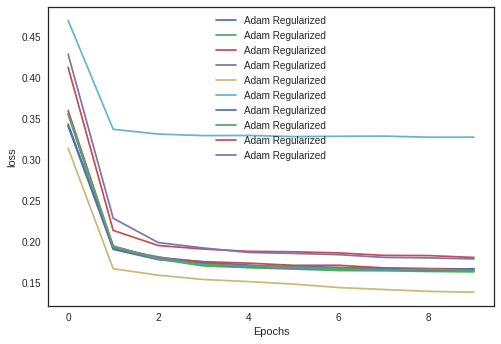

In [127]:
scores = []
neural = True
for i in range(10):
    # Sequential model
    X_train, X_dev, y_train, y_dev = train_test_split(df[selector], df['Weekly_Sales'], test_size=0.2, random_state=42)
    
    train_X = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    test_X = X_dev.values.reshape((X_dev.shape[0], 1, X_dev.shape[1]))
    
    adam_regularized = Sequential()

    # First hidden layer now regularized
    adam_regularized.add(LSTM(32,input_shape=(1,X_train.shape[1]),activation='relu',
                    kernel_regularizer = regularizers.l2(0.01),
                             return_sequences=True))
    adam_regularized.add(Dropout(0.2))
    
    # Second hidden layer now regularized
    adam_regularized.add(LSTM(16,activation='relu',
                       kernel_regularizer = regularizers.l2(0.01)
                              ,return_sequences=False))
    adam_regularized.add(Dropout(0.2))

    # Output layer stayed sigmoid
    adam_regularized.add(Dense(1,activation='linear'))

    # Setup adam optimizer
    adam_optimizer=keras.optimizers.Adam(lr=0.01,
                    beta_1=0.9, 
                    beta_2=0.999, 
                    epsilon=1e-08)

    # Compile the model
    adam_regularized.compile(optimizer=adam_optimizer,
                  loss='mean_absolute_error',
                  metrics=['mse'])

    # Train
    history_adam_regularized=adam_regularized.fit(train_X, y_train, # Train on training set
                                 epochs=10, # We will train over 1,000 epochs
                                 batch_size=2048, # Batch size 
                                 verbose=0) # Suppress Keras output
    score = adam_regularized.evaluate(x=test_X,y=y_dev)
    scores.append(score[0])

    # Plot network
    plt.plot(history_adam_regularized.history['loss'], label='Adam Regularized')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    y_pred_neural = adam_regularized.predict(test_X)
plt.show()

In [0]:
X_train, X_dev, y_train, y_dev = train_test_split(df[selector], df['Weekly_Sales'], test_size=0.2, random_state=42)
regr = RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=5, 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.6min remaining:    0.0s


building tree 2 of 100
building tree 3 of 100


In [58]:
y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.5s finished


In [63]:
print(regr.score(X_dev,y_dev['Weekly_Sales']))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


0.9959151472693454


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.6s finished


In [0]:
y_dev = y_dev.to_frame()

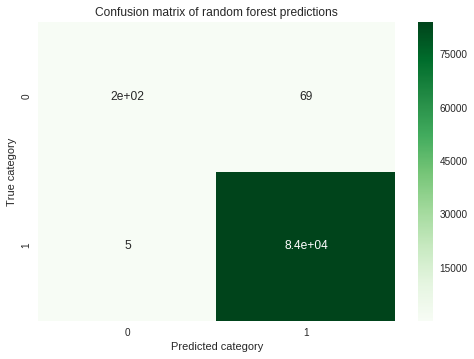

In [59]:
# Transform forest predictions to observe direction of change

y_dev['Predicted'] = y_pred_random
#y_dev['Predicted'] = y_pred_neural
#direction_true1= binary(y_dev.values)
#direction_predict = binary(y_pred_random)

direction_true1 = y_dev.Weekly_Sales.apply(lambda x: 1 if x > 0 else -1)
direction_predict = y_dev.Predicted.apply(lambda x: 1 if x > 0 else -1)
#direction_predict = np.apply_along_axis(lambda x: 1 if x > 0 else -1, 0, y_pred_random)

## show confusion matrix random forest
cnf_matrix = confusion_matrix(direction_true1, direction_predict)

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
#ax.set_xticklabels(abbreviation)
#ax.set_yticklabels(abbreviation)
plt.title('Confusion matrix of random forest predictions')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show();